<a href="https://colab.research.google.com/github/ValentinBarco/Aprendizaje-de-maquina/blob/master/Clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

customers = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectWC/data/wholesale_customers_data.csv")
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


##Normalizo las variables

In [ ]:
Clientes_norm = (customers - customers.min())/(customers.max()-customers.min());
Clientes_norm.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.322727,0.771591,0.106977,0.078173,0.085671,0.050078,0.070510,0.031745
std,0.468052,0.387136,0.112774,0.100491,0.102430,0.079789,0.116790,0.058826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.027863,0.020124,0.023174,0.011788,0.006216,0.008453
50%,0.000000,1.000000,0.075802,0.048636,0.051225,0.024670,0.019927,0.020077
75%,1.000000,1.000000,0.150968,0.097154,0.114821,0.058005,0.095997,0.037907
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##Busqueda de la cantidad optima de Clusters


In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
  KM = KMeans(n_clusters = i, max_iter = 300); # Quiero que realice 300 iteraciones
  KM.fit(Clientes_norm) 
  wcss.append(KM.inertia_) # Obtengo el valor de WCSS con el atributo inertia_

##Grafico los resultados de WCSS

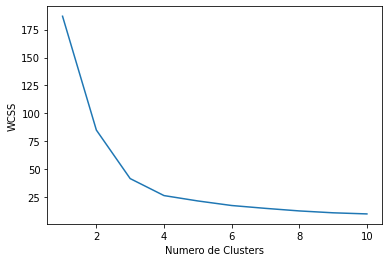

In [ ]:
plt.plot(range(1,11), wcss)
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS') # WCSS es un indicador de que tan similares son los clientes dentro de los clusters
plt.show();

Podemos apreciar que el valor de WCSS deja de disminuir de forma drastica a partir de los 3 clusters (aproximadamente).

##Verificamos si la cantidad de clusters es la correcta

In [ ]:
clustering= KMeans(n_clusters = 3, max_iter = 300); # Quiero que realice 300 iteraciones
clustering.fit(Clientes_norm); 


In [ ]:
Clientes_norm['Kmeans_Clusters'] = clustering.labels_
Clientes_norm.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Kmeans_Clusters
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,1
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,1
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559,1
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,0
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093,1


##Análisis de componentes principales
Reducción de dimensionalidad lineal usando Descomposición de valores singulares de los datos para proyectarlos a un espacio dimensional inferior.

In [ ]:
from sklearn.decomposition import PCA 

desc = PCA(n_components = 2)
desc_clientes = desc.fit_transform(Clientes_norm)

desc_clientes_df = pd.DataFrame(data= desc_clientes)

Grafico = pd.concat([desc_clientes_df,Clientes_norm['Kmeans_Clusters']],ignore_index= True,axis=1);

Grafico

,0,1,2
0,0.284621,0.683077,1
1,0.286130,0.689433,1
2,0.285370,0.687327,1
3,-0.797493,-0.212541,0
4,0.281465,0.669137,1
...,...,...,...
435,-0.794565,-0.190694,0
436,-0.801498,-0.225380,0
437,0.299880,0.768925,1
438,-0.797416,-0.211737,0


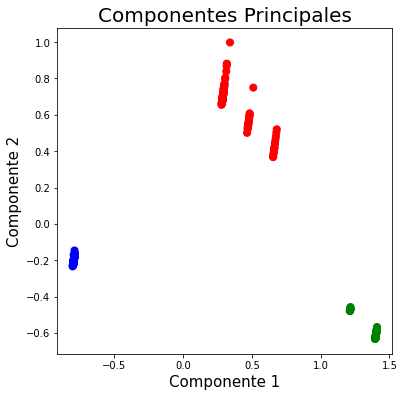

In [ ]:
#Graficamos las componentes principales y verificamos si se seapran correctamente

figura = plt.figure(figsize = (6,6))

ax = figura.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('Componentes Principales', fontsize = 20)


color_theme = np.array(["blue","red","green"])
ax.scatter(Grafico[0],Grafico[1], c = color_theme[Grafico[2]], s = 50)

plt.show()

Podemos ver que la clasificacion de las componentes principales es correcta por lo que procedemos a realizar el modelo.

##Realizamos el modelo de Kmeans

In [ ]:
#Extraemos caracteristicas del dataset

data = pd.DataFrame(Clientes_norm)

Fresh = data['Fresh'].values
Milk  = data['Milk'].values
Grocery = data['Grocery'].values
Frozen = data['Frozen'].values
Detergents_Paper = data['Detergents_Paper'].values	
Delicassen = data['Delicassen'].values

Lista = np.array(list(zip(Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen)));
Lista[1]

array([0.06289903, 0.13282409, 0.10309667, 0.02854842, 0.08058985,
       0.03698373])

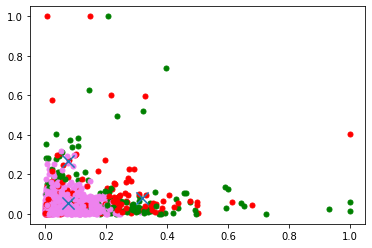

In [ ]:

Kmeans = KMeans(n_clusters=3) #Utilizamos la cantidad de clusters anteriormente calculada
Kmeans = Kmeans.fit(Lista)

etiqueta = Kmeans.predict(Lista);
centroides = Kmeans.cluster_centers_

colores =["r","g", "violet"];

#Realizamos el grafico de las componentes
for i in range(len(Lista)):
  #print("Coordenada: ", Lista[i], "Etiqueta", etiqueta[i]);
  plt.plot(Lista[i][0], Lista[i][1],Lista[i][2], Lista[i][3], Lista[i][4], Lista[i][5],c = colores[etiqueta[i]],marker = '.', markersize = 10)

plt.scatter(centroides[:,0],centroides[:,1], marker = 'x', s = 150, zorder = 10)
plt.show()   

La separacion de los diferentes clusters no se puede apreciar con claridad ya que debido a la cantidad de caracteristicas imposible graficar todo en un grafico de 2 dimenciones.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


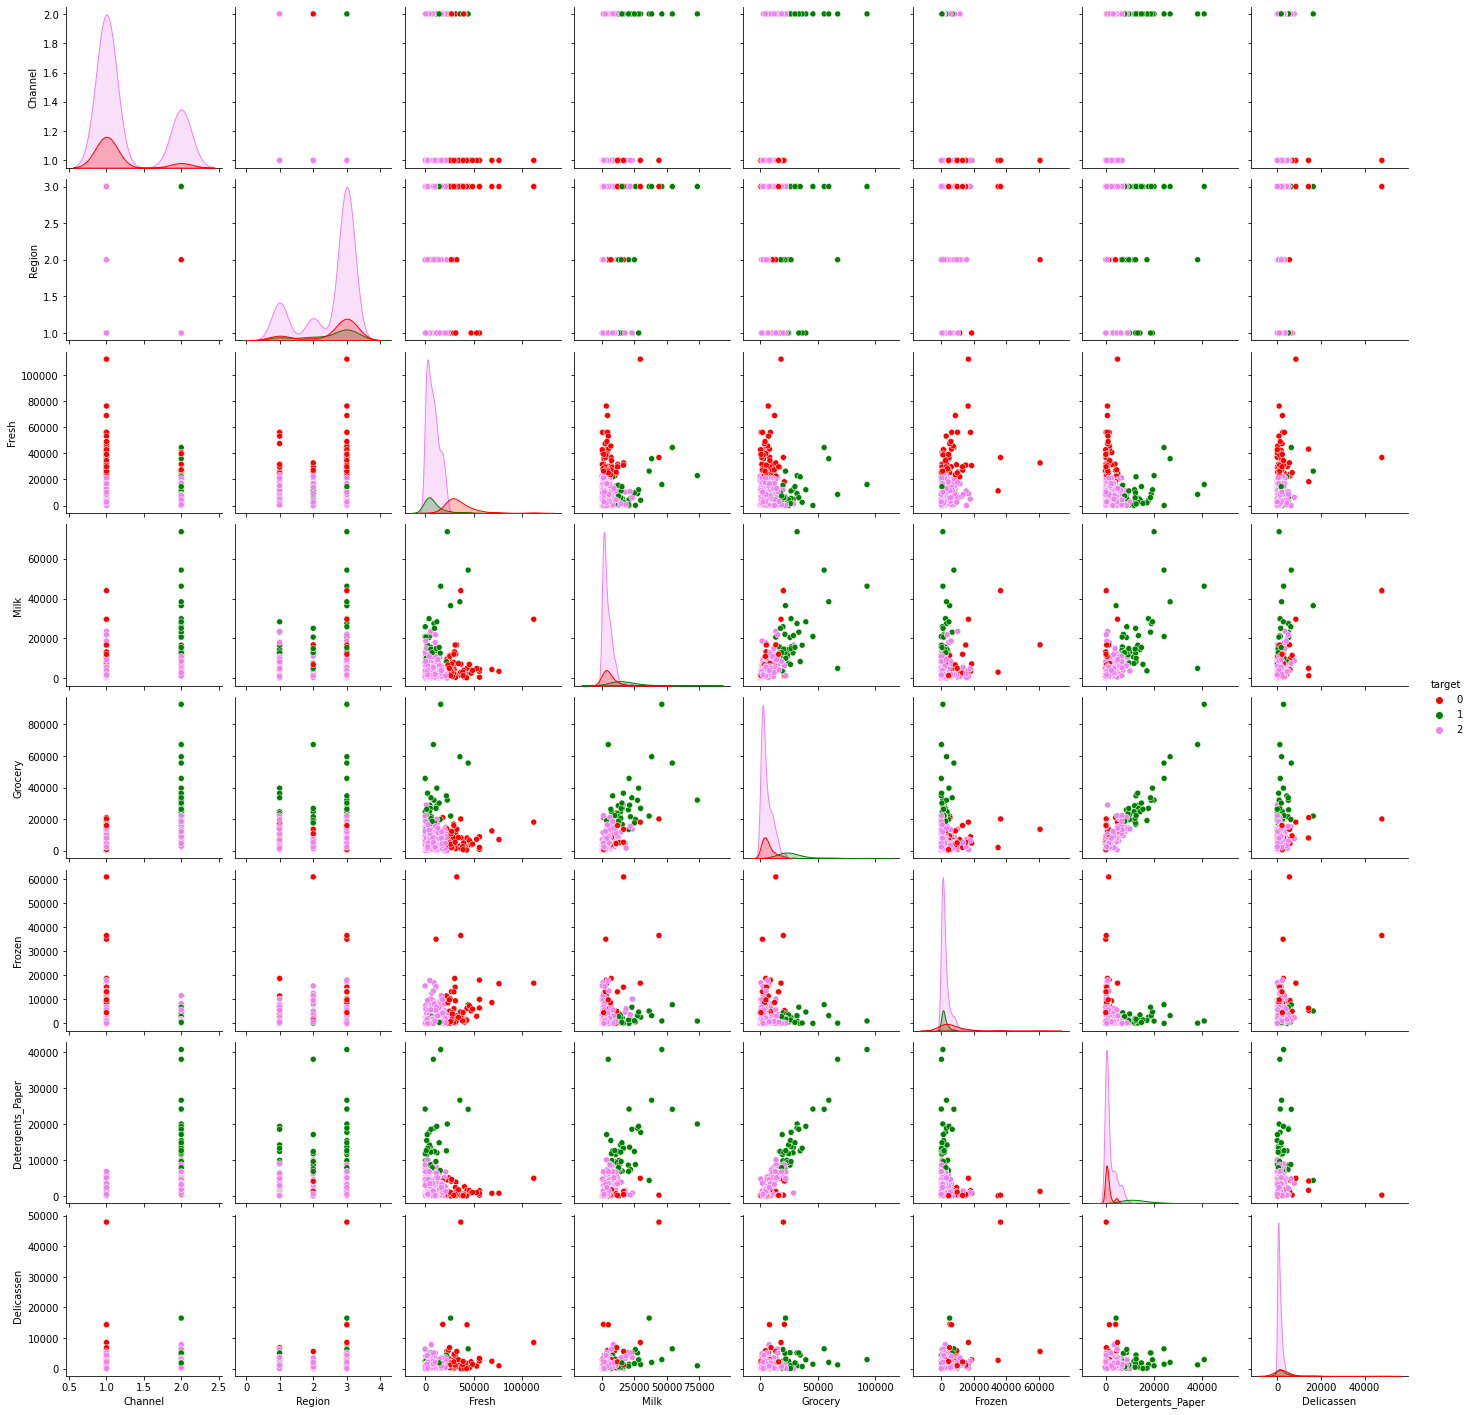

In [ ]:
import seaborn as sns
customers_view = customers.copy()
customers_view['target'] = etiqueta
sns.pairplot(customers_view, hue='target', palette = ["r","g", "violet"])